<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [4]:
print(list(df)) #headers
df.head()

['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOVisi

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


# Atenção: as perguntas depois da limpeza são baseadas até aqui na importação e depois em 'Distribuition' e não leva em conta toda a limpeza dos dados fui eu que coloquei entre estas 2 partes

#### Limpando dados:

In [4]:
#Se tiver duplicatas, anexar este código em outro campo:
#df_dropped = df.drop_duplicates()

j=0
serie = df.duplicated()
for i in serie:
    if i==True:
        j = j+1
size = len(serie)
print(f"Total rows: {size}\nDuplicated rows: {j}\nNot Duplicated: {size-j}")

Total rows: 11398
Duplicated rows: 0
Not Duplicated: 11398


In [5]:
#substituindo valores em branco por NAN e fazendo um relatórios dos valores NAN
df.replace("?", np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null




#### Trabalhando só com as colunas necessárias

In [6]:
#verificando número de NA'S
missing_data = df.isnull()

# True: is null

print (f"{missing_data['Age'].value_counts()}\n\n{missing_data['ConvertedComp'].value_counts()}\n\n{missing_data['Gender'].value_counts()}\n\n{missing_data['Respondent'].value_counts()}\n\n{missing_data['CompTotal'].value_counts()}\n\n{missing_data['WorkWeekHrs'].value_counts()}\n\n{missing_data['CodeRevHrs'].value_counts()}")

False    11111
True       287
Name: Age, dtype: int64

False    10582
True       816
Name: ConvertedComp, dtype: int64

False    11325
True        73
Name: Gender, dtype: int64

False    11398
Name: Respondent, dtype: int64

False    10589
True       809
Name: CompTotal, dtype: int64

False    11276
True       122
Name: WorkWeekHrs, dtype: int64

False    8972
True     2426
Name: CodeRevHrs, dtype: int64


In [7]:
#verificando os maiores valores de cada campo para substituir os NA'a
print (f"{df['Age'].value_counts()}\n\n{df['ConvertedComp'].value_counts()}\n\n{df['Gender'].value_counts()}\n\n{df['Respondent'].value_counts()}\n\n{df['CompTotal'].value_counts()}\n\n{df['WorkWeekHrs'].value_counts()}\n\n{df['CodeRevHrs'].value_counts()}")

28.0    787
25.0    736
27.0    722
26.0    720
29.0    697
       ... 
67.0      1
26.5      1
29.5      1
46.5      1
31.5      1
Name: Age, Length: 63, dtype: int64

2000000.0    138
1000000.0    105
100000.0      99
150000.0      92
120000.0      86
            ... 
79183.0        1
20475.0        1
288732.0       1
22056.0        1
19880.0        1
Name: ConvertedComp, Length: 3515, dtype: int64

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

4        1
16696    1
16656    1
16657    1
16658    1
        ..
8376     1
8379   

In [8]:
#substituir NA pelos maiores valores acima
df['Age'].replace(np.nan,28.0,inplace=True)
df['ConvertedComp'].replace(np.nan,2000000.0,inplace=True)
df['Gender'].replace(np.nan,'Man',inplace=True)
df['Respondent'].replace(np.nan,0,inplace=True)
df['CompTotal'].replace(np.nan,70000.0,inplace=True)
df['WorkWeekHrs'].replace(np.nan,40.0,inplace=True)
df['CodeRevHrs'].replace(np.nan,2.0,inplace=True)

In [9]:
#Testando o sucesso

missing_data = df.isnull()

print (missing_data['Age'].value_counts(),'\n\n',missing_data['ConvertedComp'].value_counts(),
       '\n\n',missing_data['ConvertedComp'].value_counts())
#False is non null

False    11398
Name: Age, dtype: int64 

 False    11398
Name: ConvertedComp, dtype: int64 

 False    11398
Name: ConvertedComp, dtype: int64


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


/home/standby2/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimen

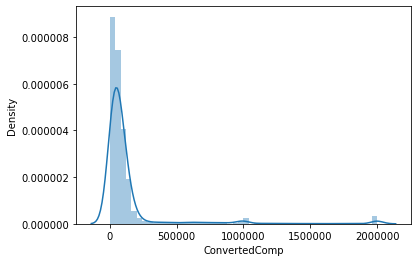

In [5]:
sns.distplot(df['ConvertedComp'])

Plot the histogram for the column `ConvertedComp`.


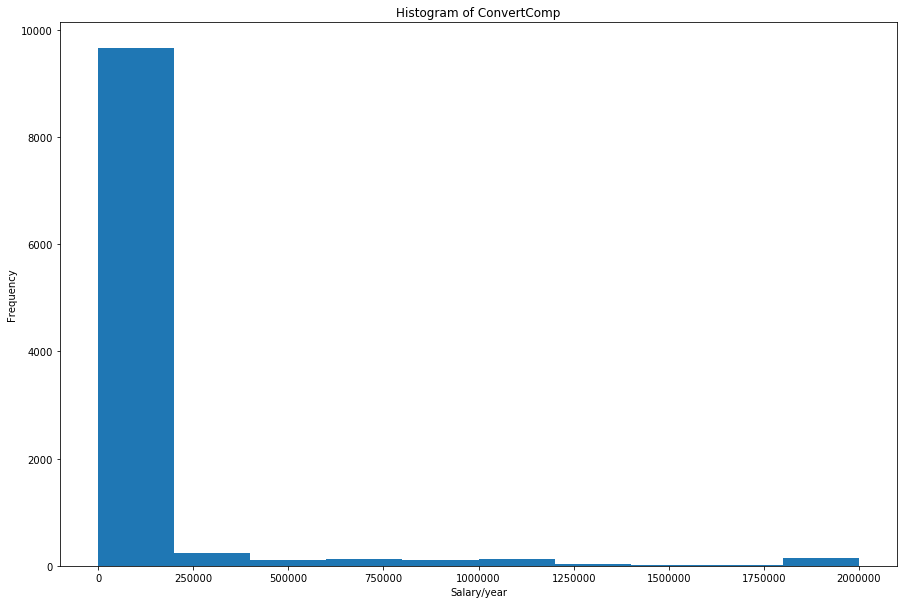

In [6]:
print("")
d = df['ConvertedComp']

d.plot(kind='hist', figsize=(15, 10))

# add a title to the histogram
plt.title('Histogram of ConvertComp')
# add y-label
plt.ylabel('Frequency')
# add x-label
plt.xlabel('Salary/year')

plt.show()


#sns.histplot(data=df, x='ConvertedComp', binwidth=3)


What is the median of the column `ConvertedComp`?


In [7]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [8]:
df['Gender'].value_counts()
#gender == 'Man'



Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [9]:
# your code goes here
#modelo: df[(df['ConvertedComp'] < lower) | (df['ConvertedComp'] > upper)].count()
df2 = df[(df['Gender'] == 'Woman')]
df2['ConvertedComp'].median()
#df2.describe()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [10]:
print(df['Age'].median())
df['Age'].describe()

29.0


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


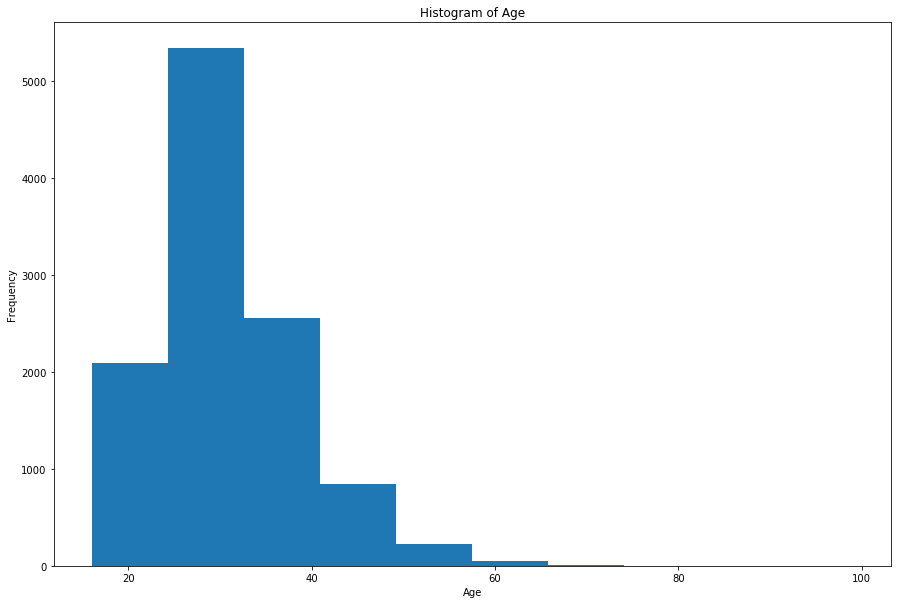

In [11]:
df['Age'].plot(kind='hist', figsize=(15, 10))

# add a title to the histogram
plt.title('Histogram of Age')
# add y-label
plt.ylabel('Frequency')
# add x-label
plt.xlabel('Age')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


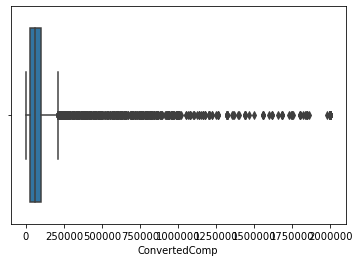

In [12]:
# your code goes here
sns.boxplot(x="ConvertedComp",data=df)
#df[(df['ConvertedComp'] < lower) | (df['ConvertedComp'] > upper)].ConvertedComp.count()
#widthfloat, optional

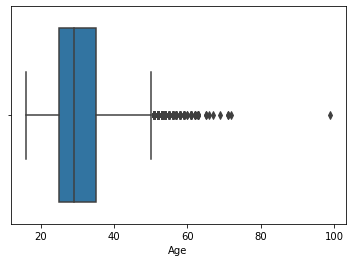

In [13]:
sns.boxplot(x="Age",data=df)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
# your code goes here
interq = 100000-26868
print(interq)
df[['ConvertedComp']].describe()

73132


,ConvertedComp
count,1.058200e+04
mean,1.315967e+05
std,2.947865e+05
min,0.000000e+00
25%,2.686800e+04
50%,5.774500e+04
75%,1.000000e+05
max,2.000000e+06


Find out the upper and lower bounds.


In [16]:
#Finding the inter quartile range  (q3 - q1 from .describe()) and multiply by 1.5 
limit = interq*1.5 #15% do intervalo inter quartil
limit_inf = 26868-limit
limit_sup = 100000+limit
#outliers1 > q3+limit, outliers2 < q1-limit
print(limit,limit_inf,limit_sup)

109698.0 -82830.0 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [19]:
# outilers: fora dos limites
dataf = df['ConvertedComp']
dataf[(dataf > limit_sup)| (dataf < limit_inf)].count()


879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [23]:
df2 = df[(dataf <= limit_sup) & (dataf >= limit_inf)]
print(df2['ConvertedComp'].median(),df2['ConvertedComp'].mean())
df2

52704.0 59883.20838915799


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11392,25134,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ecuador,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers,32.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,No,Appropriate in length,Easy
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [21]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
